In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [ ]:
import pandas as pd
gold_data = pd.read_csv('gld_price_data.csv')

In [ ]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [ ]:
correlation =gold_data.drop(['Date'],axis=1).corr()

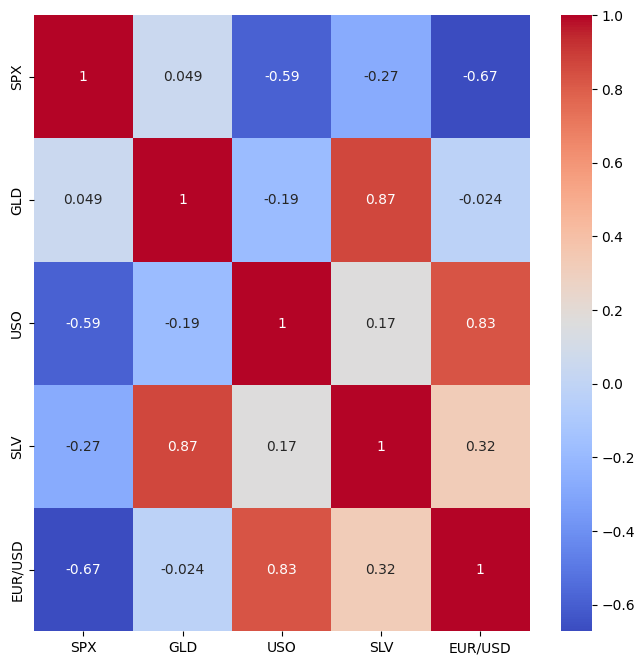

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,8))
sns.heatmap(correlation,annot=True,cmap='coolwarm')
plt.show()

In [ ]:
x=gold_data.drop(['GLD','Date'],axis=1)
y=gold_data['GLD']

In [ ]:
print(x)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [ ]:
print(y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [ ]:
x_train, x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=2)

In [ ]:
regressor = RandomForestRegressor(n_estimators=100)

In [ ]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

In [ ]:
test_data_prediction=regressor.predict(x_test)

In [ ]:
print(test_data_prediction)

[168.52709919  82.42489977 116.30609976 127.68400074 120.78590129
 154.8021975  150.41279843 126.20870003 117.59279869 126.1273005
 116.53960123 171.88840115 141.55319858 167.71559854 115.21460017
 117.81950067 138.45590286 170.26630104 158.9977032  158.73509937
 155.10530054 124.77519995 176.08559925 156.95840409 125.18700042
  93.79759982  77.4815001  120.44190002 119.10639886 167.29169998
  88.31730029 125.41769978  91.1242008  117.80990021 121.04119923
 136.67860102 115.53410133 114.93430109 147.70339981 107.22900056
 104.57500241  87.13209774 126.65830035 117.8350002  152.65739901
 119.84729975 108.34849951 108.15879819  93.16690079 127.11559786
  74.65000043 113.57819873 121.16920004 111.26649898 119.02029877
 120.49919925 158.92650003 166.46320156 147.4711975   85.65019843
  94.35460013  86.75229887  90.50210051 118.92740096 126.41690078
 127.47140049 169.05810004 122.1941997  117.37409907  98.45400068
 168.27580056 143.05939853 132.59290252 121.14780192 120.61229913
 119.822800

In [ ]:
error_score=metrics.r2_score(y_test,test_data_prediction)
print("R squared error:",error_score)

R squared error: 0.9897876295212716


In [ ]:
y_test = list(y_test)

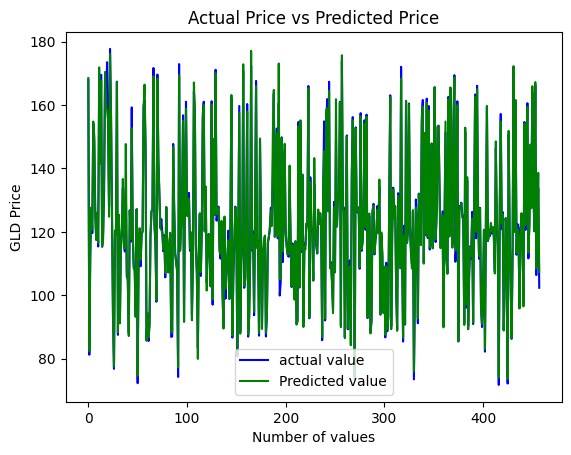

In [ ]:
plt.plot(y_test,color='blue',label='actual value')
plt.plot(test_data_prediction,color='green',label='Predicted value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel("GLD Price")
plt.legend()
plt.show()